In [2]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import interpolate, stats, signal

%matplotlib inline

In [3]:
#importing the data and removing the nan values
dc = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
dc1 = dc[~np.isnan(dc)]
jb = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/JamesBayNew.txt')[:,1]
jb1 = jb[~np.isnan(jb)]
jm = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/JohnMuirNew.txt')[:,1]
jm1 = jm[~np.isnan(jm)]
uv = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/UVicISCNew.txt')[:,1]
uv1 = uv[~np.isnan(uv)]

time = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,0]
tdc = time[~np.isnan(dc)]
tjb = time[~np.isnan(jb)]
tjm = time[~np.isnan(jm)]
tuv = time[~np.isnan(uv)]


times = [tdc,tjb,tjm,tuv]
rawtemps = [dc,jb,jm,uv]
tempsNoNan = [dc1,jb1,jm1,uv1]
title = ['Deep Cove', 'James Bay', 'John Muir', 'UVic']
title2 = ['DC', 'JB', 'JM', 'UV']

In [4]:
# uses interp1d to replace nan values in original time series.
temps = list()
for i,temp in enumerate(tempsNoNan):
    f = interpolate.interp1d(times[i],temp,kind='linear')
    newTemp = f(time)
    temps.append(newTemp)


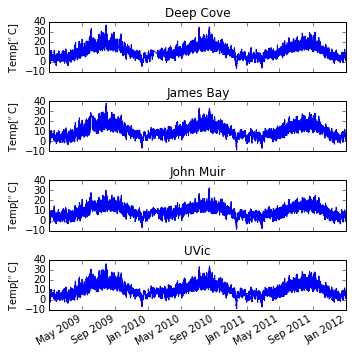

In [6]:
# plotting the different time series
fig,ax = plt.subplots(4,figsize=(5,5))
for i,j in enumerate(temps):
    ax[i].plot_date(time,j,'-')
    ax[i].set_title(title[i])
    ax[i].set_ylabel('Temp[$^o$C]')
    ax[i].set_ylim([-10,40])
fig.autofmt_xdate()
plt.tight_layout()

In [7]:
# finding the means
print '&', 'Mean','&', 'Standard Deviation','&', 'Skew','&', 'Kurtosis'
for i,j in enumerate(temps):
    mean = np.mean(j)
    #print 'The Mean temp of {} is {}'.format(title[i],mean)
    std = np.std(j)
    skew = stats.skew(j)
    krt = stats.kurtosis(j)
    #print 'The Standard Deviation of {} is {} \n'.format(title[i],mean)
    print title[i],'&', mean,'&', std,'&', skew,'&', krt

& Mean & Standard Deviation & Skew & Kurtosis
Deep Cove & 10.3016300448 & 5.98099047791 & 0.443614320919 & 0.132772732286
James Bay & 10.3107251853 & 5.83675368414 & 0.480090212186 & 0.228559531715
John Muir & 9.11998334356 & 4.8364971532 & 0.0638702008621 & 0.140581890246
UVic & 10.2371553568 & 5.70055093019 & 0.491206670657 & 0.287881662199


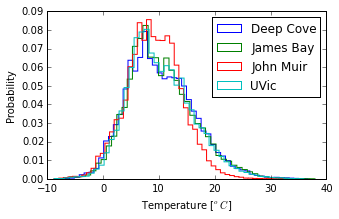

In [8]:
#plotting the PDFs
fig,ax = plt.subplots(figsize=(5,3))
def getPDF():
    for i,j in enumerate(temps):
        ax.hist(j,50,histtype='step',label=title[i],normed=True)
    ax.set_xlabel('Temperature [$^oC$]');ax.set_ylabel('Probability')
    ax.legend()
    
getPDF()

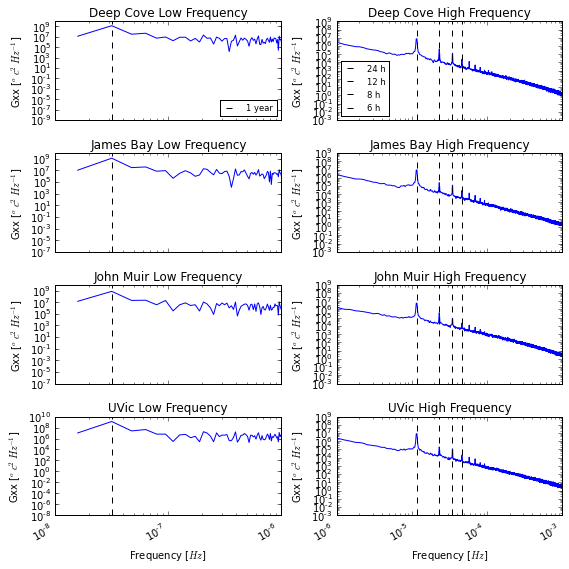

In [9]:
# plotting the spectra
fig,ax = plt.subplots(4,2,figsize=(8,8))
def getSpectra():
    nfft = 2**16
    nfft2 = 2**20
    for i,j in enumerate(temps):
        gxx, freq = mlab.psd(j, Fs=1./60., NFFT=nfft, noverlap=nfft/2)
        gxx2, freq2 = mlab.psd(j, Fs=1./60., window=mlab.window_none, NFFT=nfft2)
        
        ax[i,1].loglog(freq,gxx)
        #ax[i,1].axvline(x=1./(60*60*24.*365.),color='k',linestyle='dashed')
        ax[i,1].axvline(x=1./(60*60*24.),color='k',linestyle='dashed',label='24 h')
        ax[i,1].axvline(x=2./(60*60*24.),color='k',linestyle='dashed',label='12 h')
        ax[i,1].axvline(x=3./(60*60*24.),color='k',linestyle='dashed',label = '8 h')
        ax[i,1].axvline(x=4./(60*60*24.),color='k',linestyle='dashed',label = '6 h')
        
        ax[i,1].set_xlabel('Frequency [$Hz$]');ax[i,0].set_ylabel('Gxx [$^oc^2 Hz^{-1}$]');ax[i,0].set_title('{} Low Frequency'.format(title[i]))
        ax[i,1].set_xlim([10**-6,10**-3])
        
        ax[i,0].loglog(freq2,gxx2)
        ax[i,0].axvline(x=1./(60*60*24.*365.),color='k',linestyle='dashed',label='1 year')
        #ax[i,0].axvline(x=1./(60*60*24.),color='k',linestyle='dashed')
        ax[i,0].set_xlabel('Frequency [$Hz$]');ax[i,1].set_ylabel('Gxx [$^oc^2 Hz^{-1}$]');ax[i,1].set_title('{} High Frequency'.format(title[i]))
        ax[i,0].set_xlim([10**-8,10**-6])
        if i==0:
            ax[0,0].legend(loc=4,fontsize='small')
            ax[0,1].legend(loc=3,fontsize='small')
    fig.autofmt_xdate()
    plt.tight_layout()
getSpectra()

/Users/matthew/Dropbox/Assignments/PHYS411/venv/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


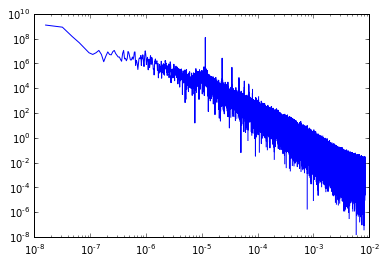

In [10]:
nfft = 2**20
gxy, freq = mlab.csd(temps[0], temps[1], NFFT = nfft, Fs = 1/60., noverlap = nfft/2)
plt.loglog(freq,gxy)

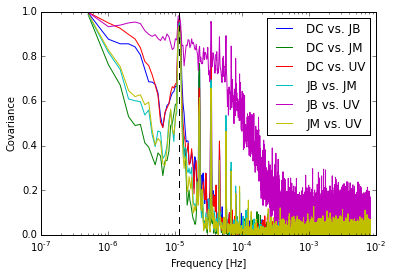

In [11]:
nfft = 2**15
for i in range(4):
    for j in range(i+1,4):
        #print i, j
        gyy, fyy = mlab.psd(temps[j], NFFT = nfft, Fs = 1/60., noverlap = nfft/2)
        gxx, fxx = mlab.psd(temps[i], NFFT = nfft, Fs = 1/60., noverlap = nfft/2)
        gxy, freq = mlab.csd(temps[i], temps[j], NFFT = nfft, Fs = 1/60., noverlap = nfft/2)
        gamma = (np.abs(gxy)**2)/(gxx*gyy)
        
        plt.semilogx(freq,gamma,label='{} vs. {}'.format(title2[i], title2[j]))
        #plt.title('Covariance Stations')
        plt.axvline(x=1./(60*60*24.),color='k',linestyle='dashed')
        plt.legend(bbox_to_anchor=[1.,1])
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Covariance')
        

# Lag Stuff

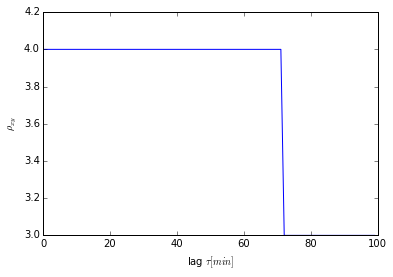

In [10]:
lags = range(0,100)
cxy = 0*np.array(lags)
rho = 0*np.array(lags)


for tau in lags:
    dc1 = temps[0]
    dc1 = dc1[tau:] 
    if tau!=0:     
        jb1 = temps[1]
        jb1 = jb1[:-tau]
        
    else:
        jb1 = temps[1]
    #print len(jb1[np.isnan(jb1)])
    cxy[tau] = np.mean(dc1*jb1)
    rho[tau] = cxy[tau]/(np.std(dc1)*np.std(jb1))
    
fig,ax = plt.subplots(1,1)

ax.plot(lags, rho)
ax.set_xlabel(r"lag $\tau [min]$")
ax.set_ylabel(r"$\rho_{xy}$")

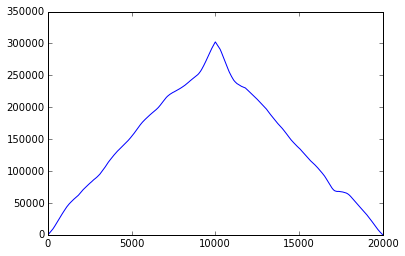

In [27]:
dc1 = temps[0]
jb1 = temps[1]
cxy = signal.correlate(dc1[10000:20000],jb1[10000:20000])
plt.plot(cxy)

[ 13.9111  27.8222  41.7333 ...,  35.2944  23.5296  11.7648]


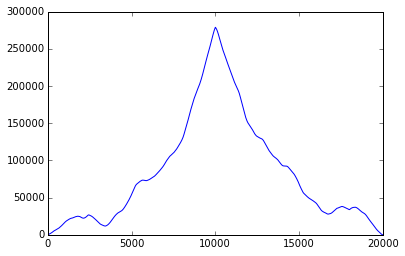

In [28]:
cxy = np.correlate(dc1[0:10000],jb1[0:10000],'full')
print cxy
plt.plot(cxy)

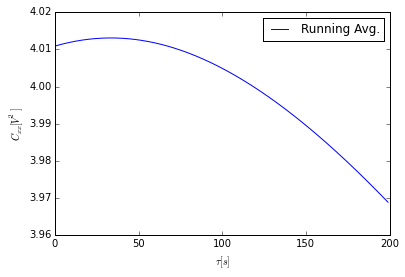

In [36]:
x1 = temps[1]
x2 = temps[0]

lags = range(0,200) # the lags are integers
cxx1=0.*np.array(lags)
# note that mean(x1)=mean(x2)=0
# tau is the lag.  
for ind,tau in enumerate(lags):
    if tau<0:
        cxx1[ind]=np.mean(x1[:tau]*x2[-tau:])
    elif tau==0:
        cxx1[ind]=np.mean(x1*x2)
    else:
        cxx1[ind]=np.mean(x1[:-tau]*x2[tau:])
rho = cxx1/(np.std(x1)*np.std(x2))
fig,ax=plt.subplots(1,1,)
ax.plot(lags,rho,label='Running Avg.')
ax.set_xlabel(r'$\tau [s]$')
ax.set_ylabel('$C_{xx} [V^2]$')
ax.legend()